In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns   
import math
import time
from sklearn.model_selection import train_test_split
import random

In [2]:
pat = pd.read_csv('data/Churn_Modelling.csv')

In [3]:
pat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


(array([7963.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2037.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

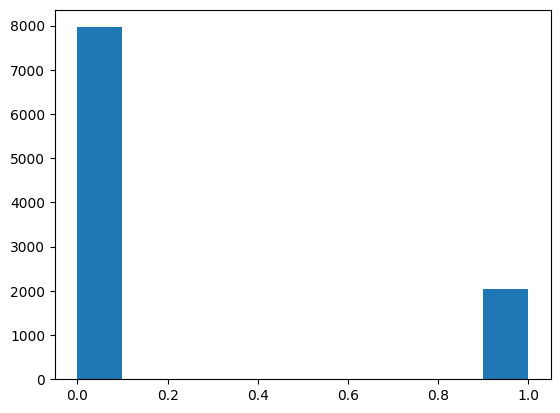

In [4]:
plt.hist(pat['Exited'])

In [5]:
pat.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2586,2587,15573242,Greene,691,France,Male,50,6,136953.47,1,1,1,2704.98,0
205,206,15773039,Ku,550,France,Male,37,3,0.00,1,1,1,179670.31,0
9729,9730,15615330,Tretiakova,651,France,Male,23,10,0.00,2,1,1,170099.23,0
7529,7530,15575430,Robson,579,France,Female,33,1,118392.75,1,1,1,157564.75,0
976,977,15570060,Palerma,586,France,Female,43,8,132558.26,1,1,0,67046.83,1


In [6]:
pat['only_1'] = 1

In [7]:
pat['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [8]:
pat['france'] = pat['Geography'] == 'France'
pat['spain'] = pat['Geography'] == 'Spain' 
pat['germany'] = pat['Geography'] == 'Germany'
pat['france'] = pat['france'].astype('int')
pat['spain'] = pat['spain'].astype('int')
pat['germany'] = pat['germany'].astype('int')
pat['gender'] = pat['Gender'] != "Female"
pat['gender'] = pat['gender'].astype('int')

In [9]:
pat.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'only_1', 'france',
       'spain', 'germany', 'gender'],
      dtype='object')

In [10]:
pat[["CreditScore", "gender", "Age", "Tenure", "Balance", "NumOfProducts", "HasCrCard", "IsActiveMember", "EstimatedSalary", "france", "spain", "germany", "only_1"]]

,CreditScore,gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,france,spain,germany,only_1
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0,1
1,608,0,41,1,83807.86,1,0,1,112542.58,0,1,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0,1
3,699,0,39,1,0.00,2,0,0,93826.63,1,0,0,1
4,850,0,43,2,125510.82,1,1,1,79084.10,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,1,0,0,1
9996,516,1,35,10,57369.61,1,1,1,101699.77,1,0,0,1
9997,709,0,36,7,0.00,1,0,1,42085.58,1,0,0,1
9998,772,1,42,3,75075.31,2,1,0,92888.52,0,0,1,1


In [11]:
pat.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,only_1,france,spain,germany,gender
2543,2544,15655192,Fiorentino,850,Spain,Female,24,1,0.00,2,0,1,69052.87,0,1,0,1,0,0
7625,7626,15689692,Walker,598,Germany,Male,19,3,150348.37,1,1,1,173784.04,0,1,0,0,1,1
9609,9610,15674833,Shao,741,France,Female,35,1,0.00,2,1,0,36557.55,0,1,1,0,0,0
207,208,15679531,Collins,618,France,Male,34,5,134954.53,1,1,1,151954.39,0,1,1,0,0,1
7908,7909,15579287,Rossi,581,France,Male,35,4,0.00,2,0,1,86383.82,0,1,1,0,0,1


In [12]:
x_train, x_test, y_train, y_test = train_test_split(pat[["CreditScore", "gender", "Age", "Tenure", "Balance", "NumOfProducts", "HasCrCard", "IsActiveMember", "EstimatedSalary", "france", "spain", "germany", "only_1"]], pat['Exited'], test_size=0.25, random_state=0)

In [13]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7500 entries, 2967 to 2732
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      7500 non-null   int64  
 1   gender           7500 non-null   int64  
 2   Age              7500 non-null   int64  
 3   Tenure           7500 non-null   int64  
 4   Balance          7500 non-null   float64
 5   NumOfProducts    7500 non-null   int64  
 6   HasCrCard        7500 non-null   int64  
 7   IsActiveMember   7500 non-null   int64  
 8   EstimatedSalary  7500 non-null   float64
 9   france           7500 non-null   int64  
 10  spain            7500 non-null   int64  
 11  germany          7500 non-null   int64  
 12  only_1           7500 non-null   int64  
dtypes: float64(2), int64(11)
memory usage: 820.3 KB


In [14]:
x_train.describe()

,CreditScore,gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,france,spain,germany,only_1
count,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.0
mean,650.463867,0.541733,38.840000,4.974400,75661.289748,1.535333,0.707067,0.516933,100169.176911,0.507733,0.248267,0.244000,1.0
std,97.169199,0.498289,10.481704,2.889462,62651.999955,0.577809,0.455138,0.499746,57498.717199,0.499974,0.432036,0.429521,0.0
min,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000,0.000000,0.000000,1.0
25%,583.000000,0.000000,32.000000,2.000000,0.000000,1.000000,0.000000,0.000000,51446.617500,0.000000,0.000000,0.000000,1.0
50%,652.000000,1.000000,37.000000,5.000000,96318.795000,1.000000,1.000000,1.000000,100067.820000,1.000000,0.000000,0.000000,1.0
75%,719.000000,1.000000,44.000000,7.000000,127311.990000,2.000000,1.000000,1.000000,149600.350000,1.000000,0.000000,0.000000,1.0
max,850.000000,1.000000,85.000000,10.000000,238387.560000,4.000000,1.000000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.0


In [15]:
# Normalise and store coeficients in dict
norm_dict_m = {}
norm_dict_s = {}

def normalise(df, cols):
    for col in cols:
        norm_dict_m[col] = df[col].mean()
        norm_dict_s[col] = df[col].std()
        df[col] = (df[col] - norm_dict_m[col]) / norm_dict_s[col]

def normalise_test(df, cols):
    for col in cols:
        df[col] = (df[col] - norm_dict_m[col]) / norm_dict_s[col]

In [16]:
normalise(x_train, ['Age', 'CreditScore', 'Tenure', 'Balance', 'EstimatedSalary'])

In [17]:
x_train.describe()

,CreditScore,gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,france,spain,germany,only_1
count,7.500000e+03,7500.000000,7.500000e+03,7.500000e+03,7.500000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,7500.000000,7500.000000,7500.0
mean,-5.191699e-16,0.541733,-3.241259e-16,-4.831691e-17,7.484383e-17,1.535333,0.707067,0.516933,8.573882e-17,0.507733,0.248267,0.244000,1.0
std,1.000000e+00,0.498289,1.000000e+00,1.000000e+00,1.000000e+00,0.577809,0.455138,0.499746,1.000000e+00,0.499974,0.432036,0.429521,0.0
min,-3.092172e+00,0.000000,-1.988226e+00,-1.721566e+00,-1.207644e+00,1.000000,0.000000,0.000000,-1.741910e+00,0.000000,0.000000,0.000000,1.0
25%,-6.942927e-01,0.000000,-6.525657e-01,-1.029396e+00,-1.207644e+00,1.000000,0.000000,0.000000,-8.473678e-01,0.000000,0.000000,0.000000,1.0
50%,1.580885e-02,1.000000,-1.755440e-01,8.859781e-03,3.297182e-01,1.000000,1.000000,1.000000,-1.762768e-03,1.000000,0.000000,0.000000,1.0
75%,7.053278e-01,1.000000,4.922864e-01,7.010301e-01,8.244062e-01,2.000000,1.000000,1.000000,8.596918e-01,1.000000,0.000000,0.000000,1.0
max,2.053492e+00,1.000000,4.403864e+00,1.739286e+00,2.597304e+00,4.000000,1.000000,1.000000,1.736096e+00,1.000000,1.000000,1.000000,1.0


In [18]:
# y_train = y_train + 1
y_train

2967    1
700     0
3481    0
1621    1
800     0
       ..
9225    0
4859    0
3264    0
9845    0
2732    1
Name: Exited, Length: 7500, dtype: int64

In [19]:
# Very Simple Approach, 1 input layer, 1 hidden layer, 1 output layer
# Neurons per layer = will adjust according to computational power

In [20]:
# activation function, we will use the relU function, f(x) = max(0, x)

In [21]:
# def activation_function_relu(x):
#     return np.vectorize(lambda x3: max(0,x3))(x)

def activation_function_sigm(x):
    return np.vectorize(lambda x3: 1 / (1 + math.e ** -(x3)))(x)

In [22]:
x = np.array([1, 2, 3, 4, -1, -3])

In [23]:
np.vectorize(lambda x3: max(0,x3))(x)

array([1, 2, 3, 4, 0, 0])

In [24]:
def evaluate(weights, inputs):
    inputs = np.array(inputs).reshape(len(inputs), 1)
    return np.matmul(weights, inputs)
def apply_activation_func(inputs):
    return activation_function_sigm(inputs)

In [25]:
# weights matrix = [features x neurons] for each layer
# incorporate the bias term in weights as an extra column and add an extra feature which always resolves to 1 in the data

In [26]:
# Use backpropogation(glorified GD) to find the right params and we end up with a classifier
# Use SGD

[[ 4.56841452e-04  4.24670462e-01 -4.10473015e-01  5.01376982e-01
  -1.56466762e-01]]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255


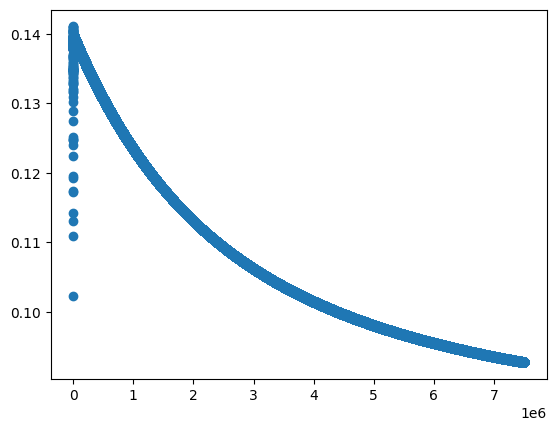

In [27]:
weights_h1= np.random.rand(4, 13) * math.sqrt(2.0 / 13)# 12 features + 1 bias term and 4 neurons
equalrand = np.vectorize(lambda x: x * random.choice([+1, -1]))
weights_h1 = equalrand(weights_h1)
# print(weights_h1)   
weights_o = np.random.rand(1, 5) * math.sqrt(2.0 / 5) * random.choice([+1, -1]) # 4 neuron output into 1 + 1 bias
weights_o = equalrand(weights_o)
print(weights_o)

# weights_h1= np.zeros((4, 13))
# weights_o = np.zeros((1, 5))

def train_rowwise(row, weights):
    outputs = evaluate(weights, row)
    return apply_activation_func(outputs)

allerrs = []
cumallerrs = []
sumall = 0
alpha = 0.001
batch_size = 128
# backpropf = np.vectorize(lambda x: 0 if x <= 0 else 1)
backpropf = np.vectorize(lambda x: x * (1 - x))
for i in range(500):
    print(i)
    lst = list(zip(x_train.iterrows(), y_train.items()))
    random.shuffle(lst)
    bs = 0
    k = 0
    outputs_agg = np.zeros((1, 5))
    output2_agg = 0.0
    y_row_agg = 0.0
    x_row_agg = np.zeros((13,))
    for x_row, y_row in lst:
        bs +=1
        k += 1
        outputs = train_rowwise(x_row[1], weights_h1)
        outputs = np.append(outputs, 1)
        outputs_agg += outputs
        output2 = train_rowwise(outputs, weights_o)
        output2_agg += output2
        y_row_agg += y_row[1]
        x_row_agg += np.array(x_row[1])
         # Now calculate backprop vals
        # Whereever outputs == 0 gradient is 0 in that direction else 1
        # for relu function

        err = (y_row[1] - output2)**2 / 2
        # print(err)
        allerrs.append(err)
        sumall += err
        cumallerrs.append(sumall / len(allerrs))

        if k != len(lst)-1 and bs != batch_size:
            continue
        
        outputs_agg /= bs
        # print(outputs_agg)
        x_row_agg /= bs
        # print(x_row_agg)
        output2_agg /= bs
        y_row_agg /= bs
        bs = 0
        
        # adjust weights based on alpha and this

        backprop_c = output2_agg - y_row_agg

        layer_prop_c = backprop_c * backpropf(output2_agg)
        
        error_grad_op = layer_prop_c * outputs_agg

        # print(error_grad_op)
        
        # Now calculate error term for hidden layer

        backprop_c = backprop_c * weights_o

        layer_prop_h_c = backprop_c * backpropf(outputs_agg)

        # print(layer_prop_h_c)

        n_weights_h1 = np.zeros((4, 13))
        i = 0
        for err_n in n_weights_h1:
            n_weights_h1[i] = layer_prop_h_c[0][i] * x_row_agg 
            i+=1

        weights_o -= alpha * error_grad_op
        weights_h1 -= alpha * n_weights_h1

        outputs_agg = np.zeros((1, 5))
        output2_agg = 0.0
        y_row_agg = 0.0
        x_row_agg = np.zeros((13,))

print(weights_h1)

plt.scatter([i for i in range(len(cumallerrs))], cumallerrs)

In [28]:
y_train

2967    1
700     0
3481    0
1621    1
800     0
       ..
9225    0
4859    0
3264    0
9845    0
2732    1
Name: Exited, Length: 7500, dtype: int64

In [29]:
# y_test = y_test + 1
y_test

9394    0
898     1
2398    0
5906    0
2343    0
       ..
8764    0
4359    0
2041    0
1108    0
3332    0
Name: Exited, Length: 2500, dtype: int64

In [30]:
normalise_test(x_test, ['Age', 'CreditScore', 'Tenure', 'Balance', 'EstimatedSalary'])

In [31]:
x_test.describe()

,CreditScore,gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,france,spain,germany,only_1
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.00000,2500.000000,2500.000000,2500.0
mean,0.002673,0.557600,0.031216,0.053159,0.052646,1.514800,0.700800,0.509600,-0.005491,0.48240,0.246000,0.271600,1.0
std,0.978785,0.496771,1.002162,1.002893,0.982786,0.592893,0.457999,0.500008,1.001008,0.49979,0.430765,0.444874,0.0
min,-2.937802,0.000000,-1.988226,-1.721566,-1.207644,1.000000,0.000000,0.000000,-1.740545,0.00000,0.000000,0.000000,1.0
25%,-0.663419,0.000000,-0.652566,-0.683311,-1.207644,1.000000,0.000000,0.000000,-0.877218,0.00000,0.000000,0.000000,1.0
50%,0.010663,1.000000,-0.127842,0.008860,0.380710,1.000000,1.000000,1.000000,0.008837,0.00000,0.000000,0.000000,1.0
75%,0.653871,1.000000,0.492286,1.047115,0.840466,2.000000,1.000000,1.000000,0.833435,1.00000,0.000000,1.000000,1.0
max,2.053492,1.000000,5.071695,1.739286,2.796987,4.000000,1.000000,1.000000,1.735718,1.00000,1.000000,1.000000,1.0


In [32]:
ypred = []
yprednorm = []
for x_row in x_test.iterrows():
        outputs = train_rowwise(x_row[1], weights_h1)
        outputs = np.append(outputs, 1)
        output2 = train_rowwise(outputs, weights_o)
        ypred.append(output2[0, 0])
        yprednorm.append(0 if output2 < 0.5 else 1)

In [33]:
print(set(ypred))
print(set(yprednorm))

{0.26048340735284015, 0.21855710445278476, 0.2521915207630414, 0.2752985922783786, 0.2618958740360533, 0.25256882753672016, 0.2769790598651234, 0.30222064383909597, 0.2304265791775073, 0.25053484673555104, 0.23631418721743103, 0.21877742185235, 0.2570771184131825, 0.26069606871781176, 0.2437165812704306, 0.22847668986158237, 0.32451880934069244, 0.2701251577617922, 0.26926419851285294, 0.24009554394931246, 0.23587206815593478, 0.22194889389682618, 0.21715492467091482, 0.2375861766962615, 0.2687516411504882, 0.2206442027098561, 0.22461695299967135, 0.23249428286785362, 0.202481852031049, 0.2677351516167167, 0.2562395876018428, 0.2617105789424516, 0.24678334780127506, 0.3102331158920585, 0.29053057686960826, 0.294413274137497, 0.24242746002146984, 0.2408127619866799, 0.23193533091301438, 0.2598535603481978, 0.24766225002326087, 0.27185338516292396, 0.2776960731387384, 0.24668596846123242, 0.23210528062393015, 0.2372942948792947, 0.2525783463643237, 0.2641228778625831, 0.2669872412002335,

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, yprednorm)

0.7964